In [ ]:
1. Loading and Exploring the Dataset:

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/dhanu/Downloads/sales_data_analytics.csv")


In [3]:
# Displaying the first few rows of the dataset
print("The first few rows of the dataset: ")
df.head()

The first few rows of the dataset: 


,Transaction_ID,Date,Gross_Sales,COGS,Manufacturing_Costs,Freight_Costs,Net_Sales,Profit/Loss
0,1,2023-10-08,3787.48,1896.15,197.28,332.67,1361.38,-534.77
1,2,2023-06-01,8974.58,5771.36,523.75,292.50,2386.97,-3384.39
2,3,2023-10-17,3200.56,2236.51,314.98,420.84,228.23,-2008.28
3,4,2023-01-22,5545.91,3266.46,423.27,89.16,1767.02,-1499.44
4,5,2023-10-02,8664.75,5536.94,1141.60,166.99,1819.22,-3717.72


In [4]:
# Get a summary of statistics of the dataset
print("Summary Statistics:")
df.describe()

Summary Statistics:


,Transaction_ID,Gross_Sales,COGS,Manufacturing_Costs,Freight_Costs,Net_Sales,Profit/Loss
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,5527.027540,3027.424310,545.396770,282.564880,1671.641580,-1355.782730
std,288.819436,2616.394203,1523.140533,309.267346,130.218122,1089.280367,1176.079708
min,1.000000,1011.030000,449.040000,67.780000,51.330000,-260.240000,-5349.940000
25%,250.750000,3349.185000,1773.505000,292.717500,167.692500,813.842500,-2087.262500
50%,500.500000,5510.985000,3052.885000,502.025000,282.505000,1556.775000,-1131.725000
75%,750.250000,7817.182500,4157.957500,741.897500,400.515000,2435.187500,-473.240000
max,1000.000000,9994.940000,6946.610000,1456.330000,498.370000,4897.510000,903.040000


In [5]:
# Get a summary of the dataset
print("\nData types and missing values:")
df.info()


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Transaction_ID       1000 non-null   int64  
 1   Date                 1000 non-null   object 
 2   Gross_Sales          1000 non-null   float64
 3   COGS                 1000 non-null   float64
 4   Manufacturing_Costs  1000 non-null   float64
 5   Freight_Costs        1000 non-null   float64
 6   Net_Sales            1000 non-null   float64
 7   Profit/Loss          1000 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 62.6+ KB


In [6]:
# Check for missing values
df.isnull().sum()

Transaction_ID         0
Date                   0
Gross_Sales            0
COGS                   0
Manufacturing_Costs    0
Freight_Costs          0
Net_Sales              0
Profit/Loss            0
dtype: int64

2.Data cleaning:
Here we don't have any missing values.
for other datasets we can manage them by performing, Fill or drop missing values by using
df = "df.dropna()" or "df.fillna()"

3.Exploratory Data Analysis (EDA):
Perform initial visualizations to understand the data distribution and relationships.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate profit/loss if not already present
df['Profit/Loss'] = df['Net_Sales'] - df['COGS'] - df['Manufacturing_Costs'] - df['Freight_Costs']

# Summary statistics for financial metrics
financial_metrics = ['Gross_Sales', 'Net_Sales', 'COGS', 'Manufacturing_Costs', 'Freight_Costs', 'Profit/Loss']
df[financial_metrics].describe()


,Gross_Sales,Net_Sales,COGS,Manufacturing_Costs,Freight_Costs,Profit/Loss
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5527.027540,1671.641580,3027.424310,545.396770,282.564880,-2183.744380
std,2616.394203,1089.280367,1523.140533,309.267346,130.218122,1361.778368
min,1011.030000,-260.240000,449.040000,67.780000,51.330000,-7161.120000
25%,3349.185000,813.842500,1773.505000,292.717500,167.692500,-3033.570000
50%,5510.985000,1556.775000,3052.885000,502.025000,282.505000,-1910.990000
75%,7817.182500,2435.187500,4157.957500,741.897500,400.515000,-1116.525000
max,9994.940000,4897.510000,6946.610000,1456.330000,498.370000,278.800000


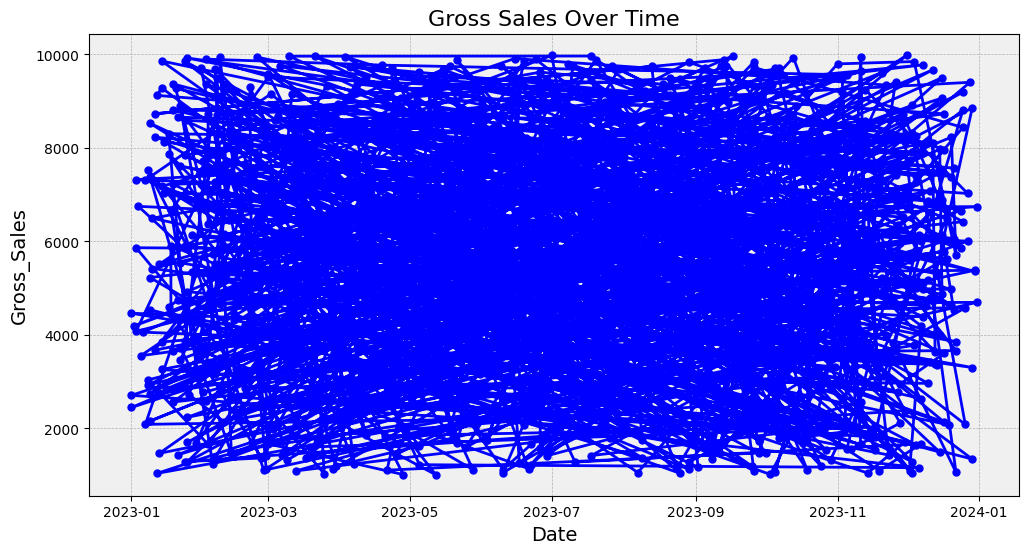

In [15]:

import matplotlib.dates as mdates

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plotting Gross Sales over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Gross_Sales'], color='blue', marker='o', linestyle='-', linewidth=2, markersize=5)

# Adding titles and labels
plt.title('Gross Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Gross_Sales', fontsize=14)


# Adding grid and customizing colors
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#f0f0f0')

# Show the plot
plt.show()


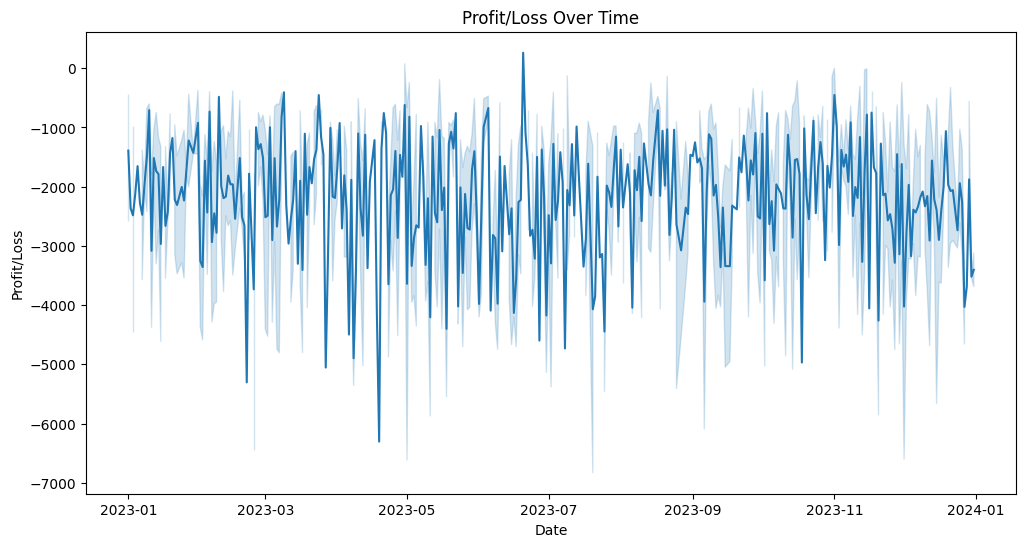

In [23]:
# Profit/Loss over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Profit/Loss')
plt.title('Profit/Loss Over Time')
plt.show()

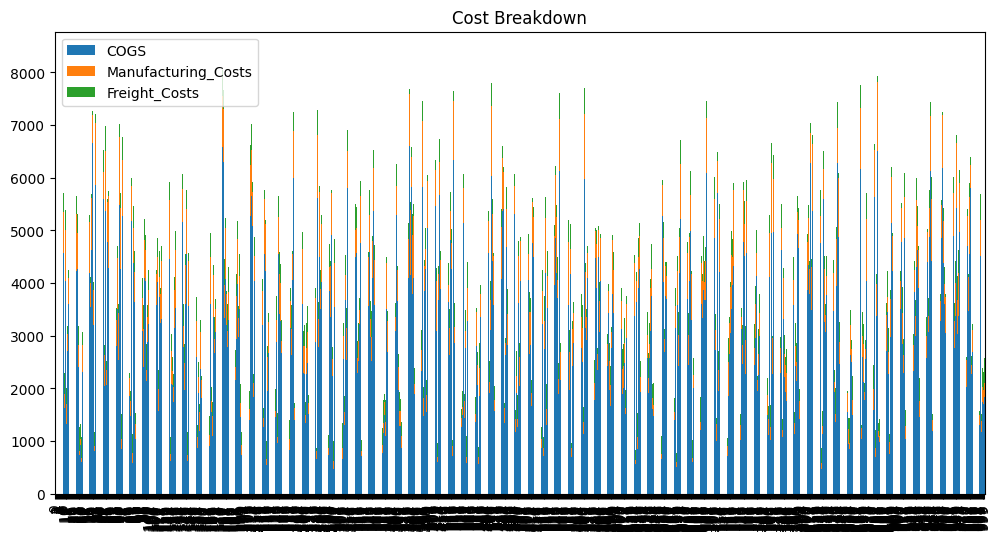

In [19]:
# Cost breakdown
costs = ['COGS', 'Manufacturing_Costs', 'Freight_Costs']
df[costs].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Cost Breakdown')
plt.show()

C:\Users\dhanu\AppData\Local\Temp\ipykernel_3792\188547802.py:2: FutureWarning: 'A-JUN' is deprecated and will be removed in a future version, please use 'Y-JUN' instead.
  df['Fiscal Year'] = df['Date'].dt.to_period('A-JUN')


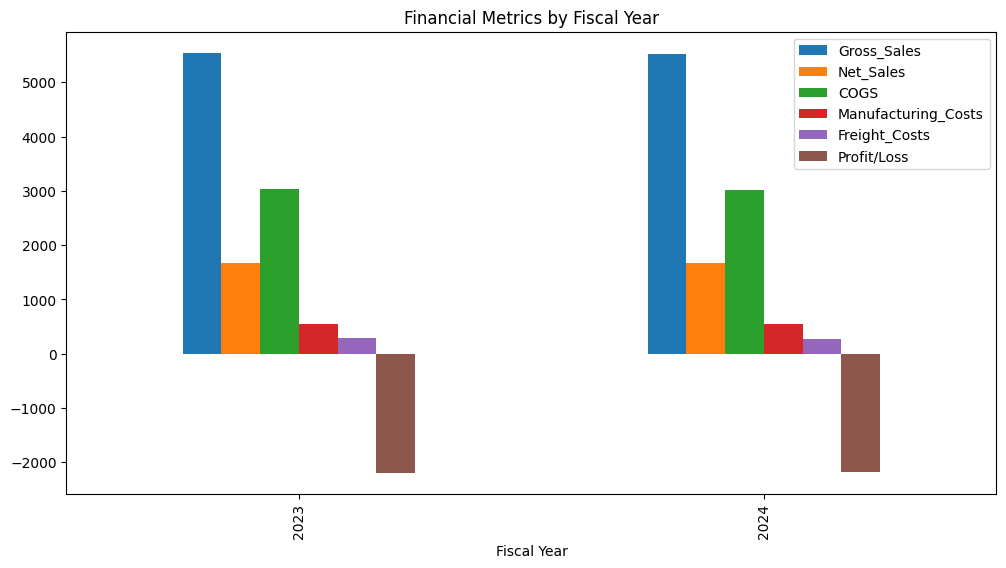

In [21]:

# Extract fiscal year
df['Fiscal Year'] = df['Date'].dt.to_period('A-JUN')

# Group by fiscal year and calculate mean values
fiscal_data = df.groupby('Fiscal Year')[financial_metrics].mean()

# Plot fiscal year trends
fiscal_data.plot(kind='bar', figsize=(12, 6))
plt.title('Financial Metrics by Fiscal Year')
plt.show()


In [36]:
# Group by fiscal year and calculate mean values
fiscal_data = df.groupby('Fiscal Year').mean()

# Display the grouped data
fiscal_data.head()


,Transaction_ID,Date,Gross_Sales,COGS,Manufacturing_Costs,Freight_Costs,Net_Sales,Profit/Loss
Fiscal Year,,,,,,,,
2023,506.372188,2023-03-29 16:41:13.619632128,5543.482679,3031.945153,548.696299,286.953047,1675.888180,-2191.706319
2024,494.880626,2023-10-06 10:28:24.892367872,5511.280841,3023.098102,542.239295,278.365636,1667.577808,-2176.125225


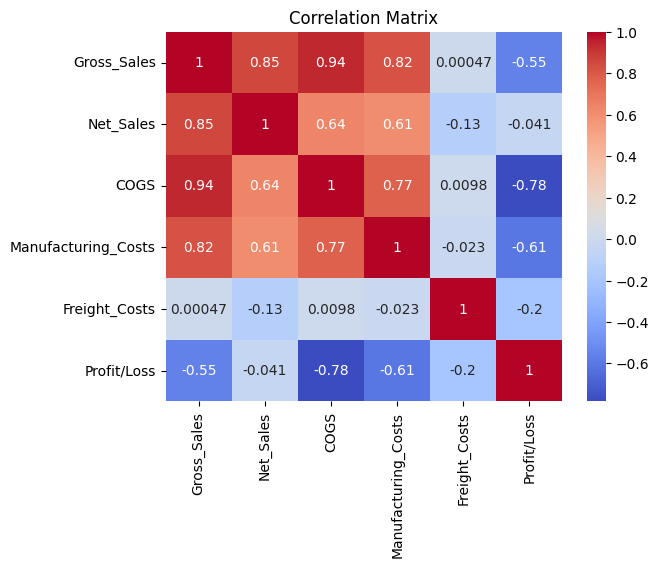

In [24]:
# Correlation matrix
correlation_matrix = df[financial_metrics].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

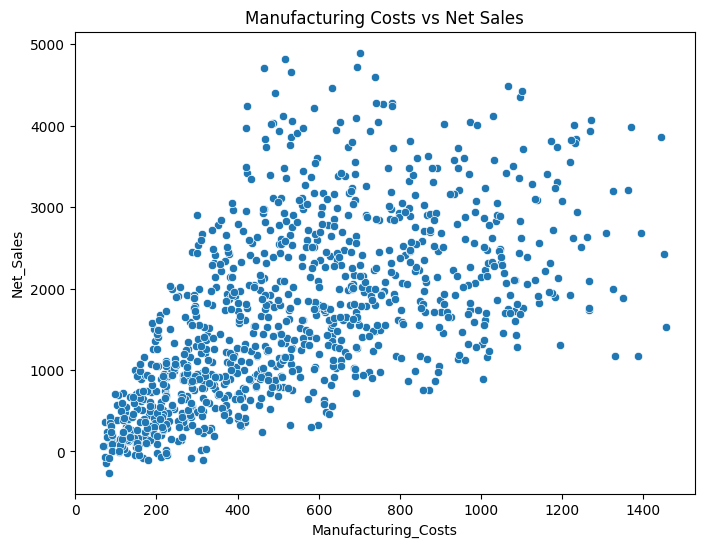

In [26]:
# Scatter plot for manufacturing costs vs net sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Manufacturing_Costs', y='Net_Sales')
plt.title('Manufacturing Costs vs Net Sales')
plt.show()

Text(0.5, 1.0, 'Freight Costs vs Profit/Loss')

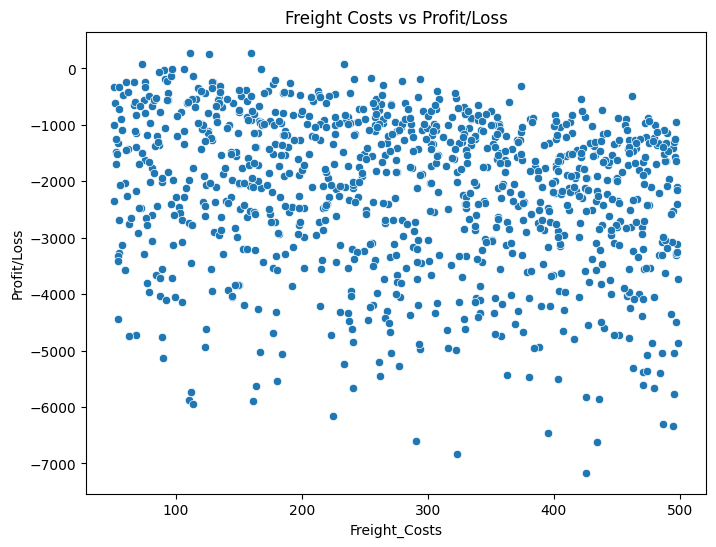

In [28]:
# Scatter plot for freight costs vs profit/loss
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Freight_Costs', y='Profit/Loss')
plt.title('Freight Costs vs Profit/Loss')

<>:4: SyntaxWarning: invalid escape sequence '\_'
<>:4: SyntaxWarning: invalid escape sequence '\_'
C:\Users\dhanu\AppData\Local\Temp\ipykernel_3792\2439135111.py:4: SyntaxWarning: invalid escape sequence '\_'
  plt.plot(fiscal_data.index.to_timestamp(), fiscal_data['Freight_Costs'], label='Freight\_Costs', color='green', marker='o')


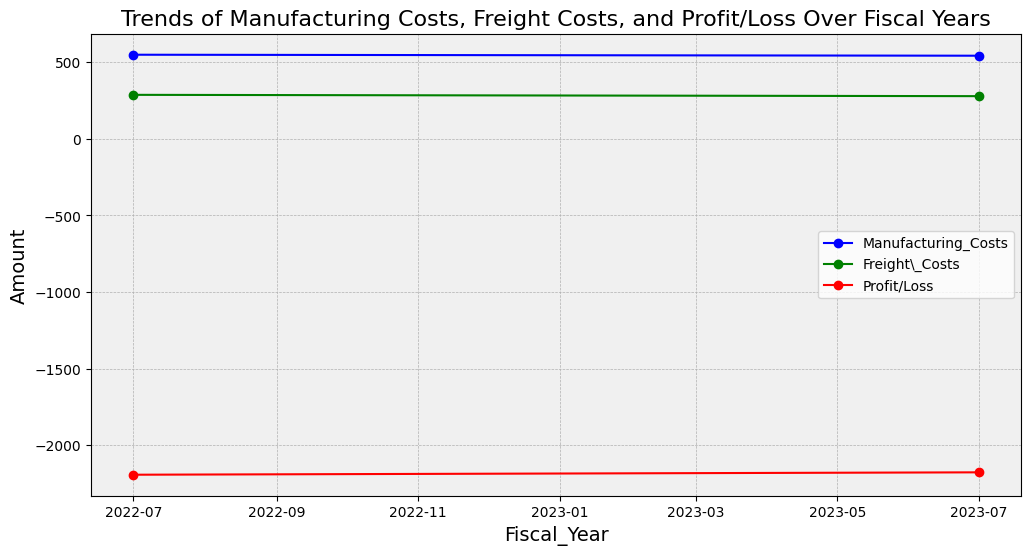

In [29]:
# Plotting trends over fiscal years
plt.figure(figsize=(12, 6))
plt.plot(fiscal_data.index.to_timestamp(), fiscal_data['Manufacturing_Costs'], label='Manufacturing_Costs', color='blue', marker='o')
plt.plot(fiscal_data.index.to_timestamp(), fiscal_data['Freight_Costs'], label='Freight\_Costs', color='green', marker='o')
plt.plot(fiscal_data.index.to_timestamp(), fiscal_data['Profit/Loss'], label='Profit/Loss', color='red', marker='o')

# Adding titles and labels
plt.title('Trends of Manufacturing Costs, Freight Costs, and Profit/Loss Over Fiscal Years', fontsize=16)
plt.xlabel('Fiscal_Year', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#f0f0f0')

# Show the plot
plt.show()


Interpretation:


Correlation Analysis: The heatmap will show the correlation coefficients between manufacturing                             costs, freight costs, and profitability. A high positive or negative                                 correlation indicates a strong relationship.


Trends Visualization: The line plot will help visualize how manufacturing costs, freight costs, and                        profitability have changed over different fiscal years.


Regression Analysis: The regression results will provide coefficients that quantify the impact of                          manufacturing costs and freight costs on profitability. The p-values will                            indicate the statistical significance of these relationships.
